In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [39]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [40]:
X.shape, y.shape

((1000, 2), (1000,))

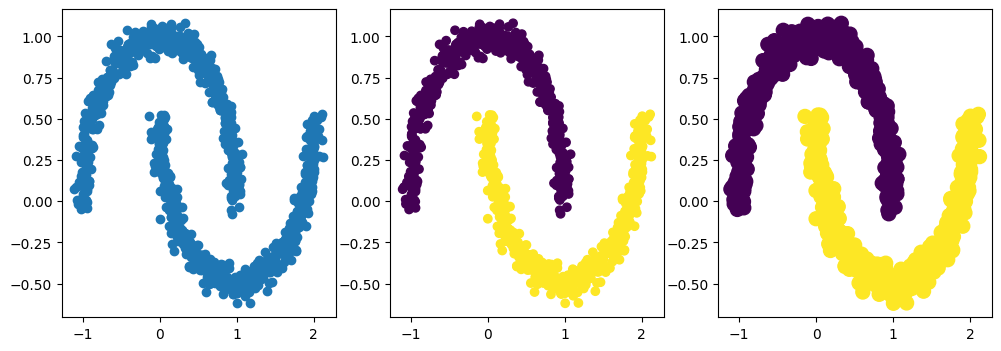

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.scatter(X[:,0], X[:,1])
ax2.scatter(X[:,0], X[:,1], c=y) # c: color
ax3.scatter(X[:,0], X[:,1], c=y, s=100) # point size, try s=y

## Complex Model

In [6]:
# Step 1 import libraries

# Step 2: define layers

model = Sequential()

model.add(Dense(10, activation="sigmoid", input_dim=2)) # layer 1 that accepts the input
model.add(Dense(10, activation="sigmoid")) #1
model.add(Dense(10, activation="sigmoid")) #2
model.add(Dense(10, activation="sigmoid")) #3
model.add(Dense(10, activation="sigmoid")) #4
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.add(Dense(1, activation="sigmoid")) # 7: output layer with 1 node


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Step 3: Compile Model

model.compile(loss='binary_crossentropy',metrics=['accuracy']) 

In [33]:
# Step 4: Model Training

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

history = model.fit(X_train,y_train, epochs=100) # default batch size = 32

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8486 - loss: 0.2725
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8787 - loss: 0.2348 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8577 - loss: 0.2472 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.2537 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2300 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8735 - loss: 0.2437 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8651 - loss: 0.2332 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8603 - loss: 0.2457 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8874 - loss: 0.2278 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8977 - loss: 0.2198 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8971 - loss: 0.2313 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8537 - loss

In [34]:
model.optimizer.get_config()['learning_rate']

0.0010000000474974513

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

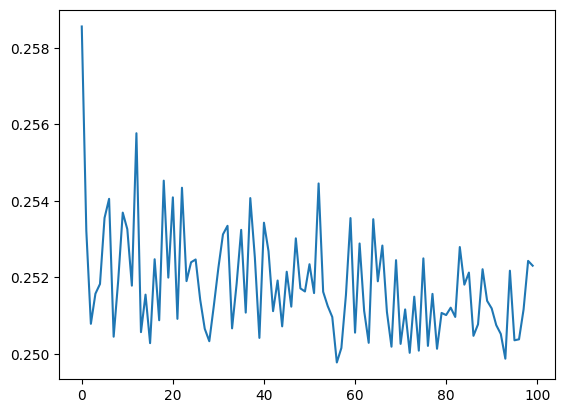

In [36]:
# Step 5: model evaluation

plt.plot(history.history['loss']) # 

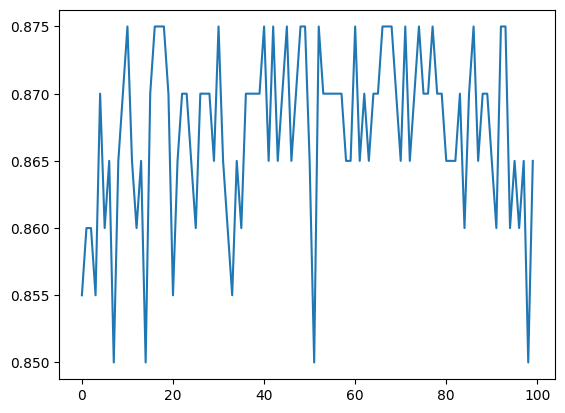

In [37]:
plt.plot(history.history['accuracy'])

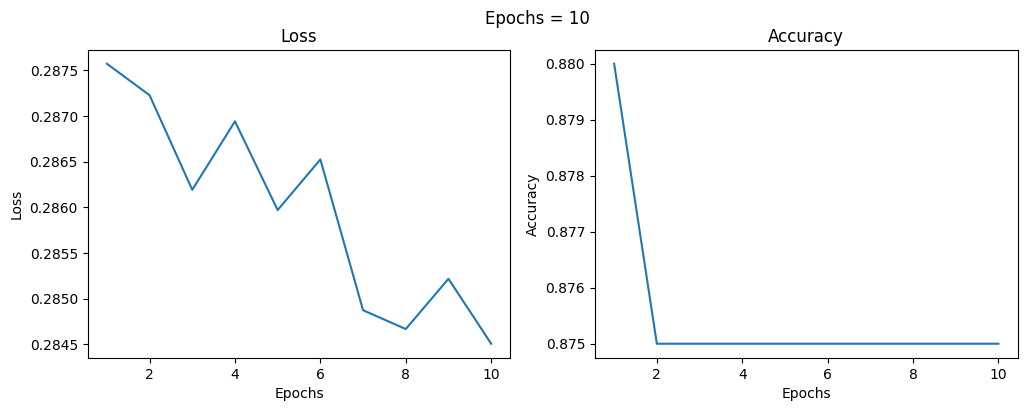

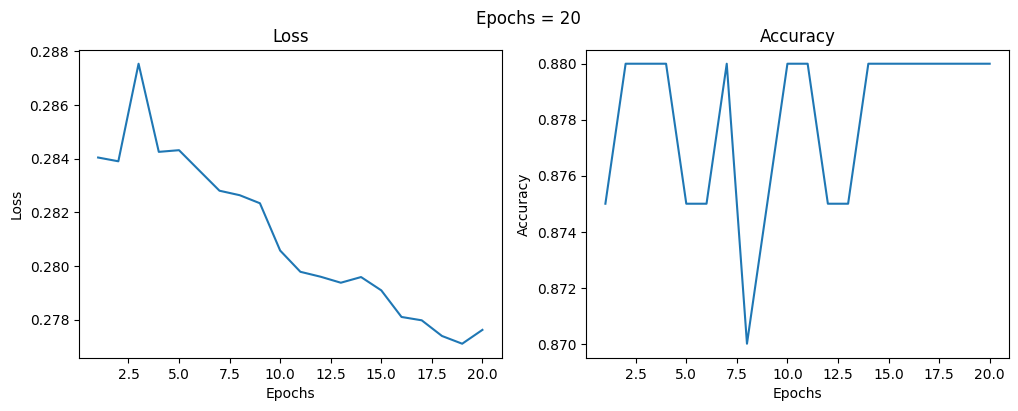

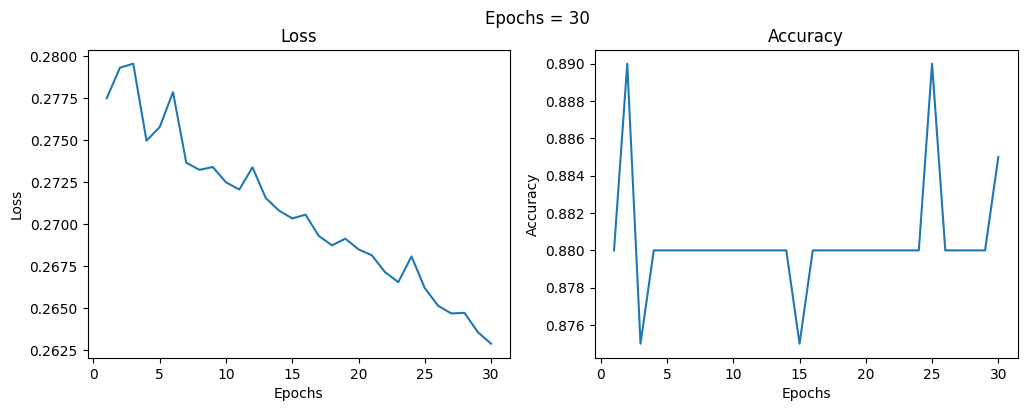

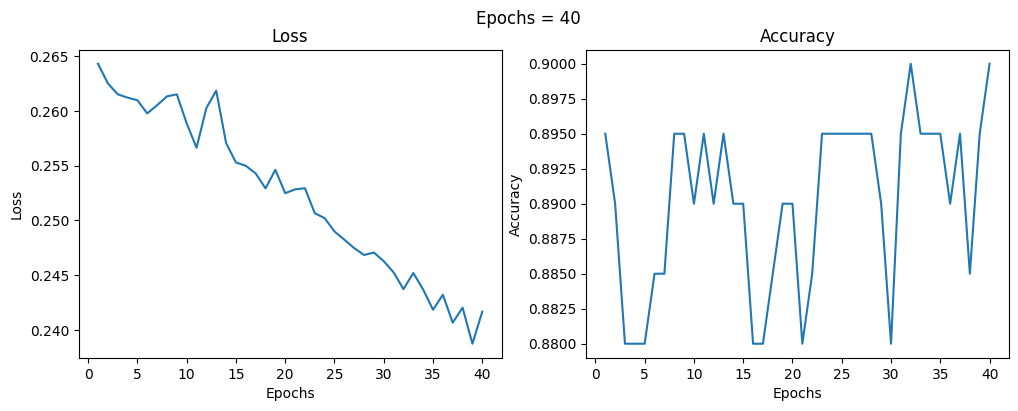

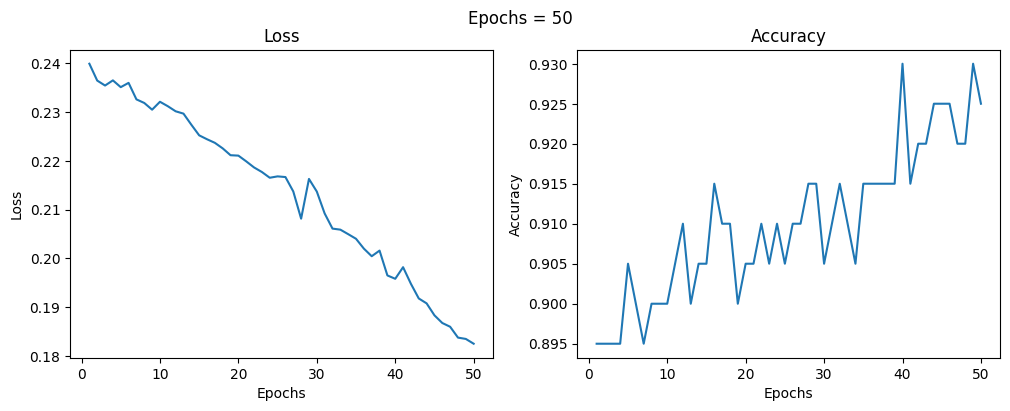

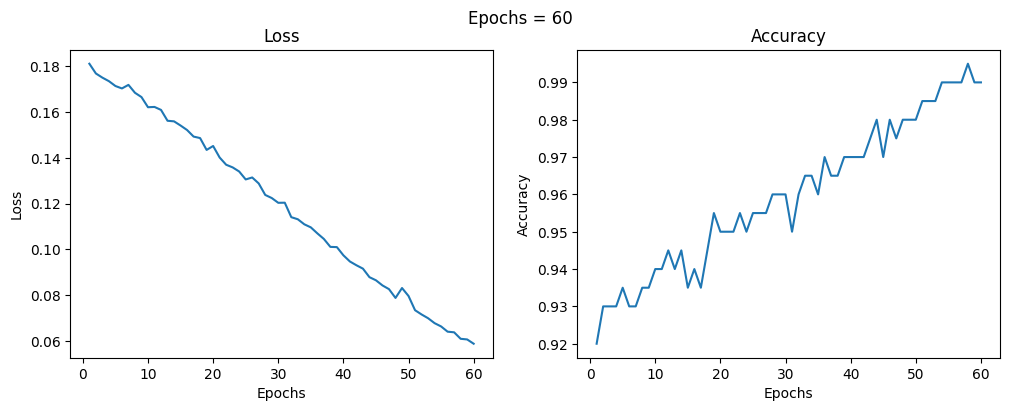

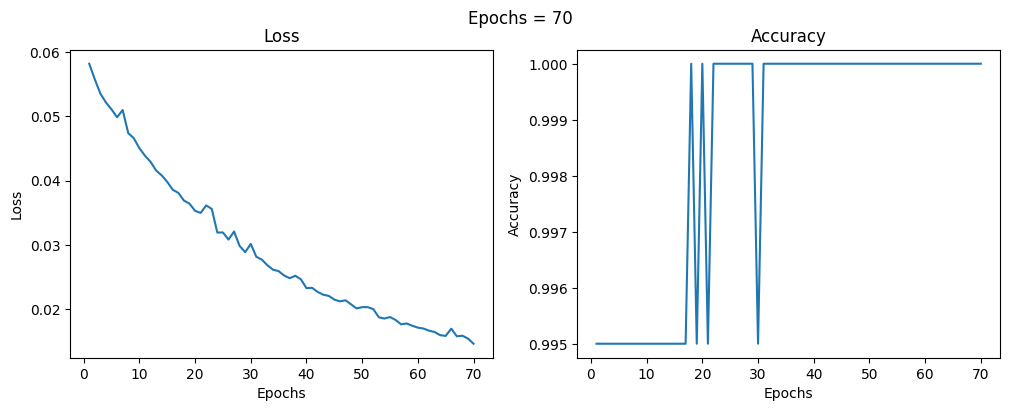

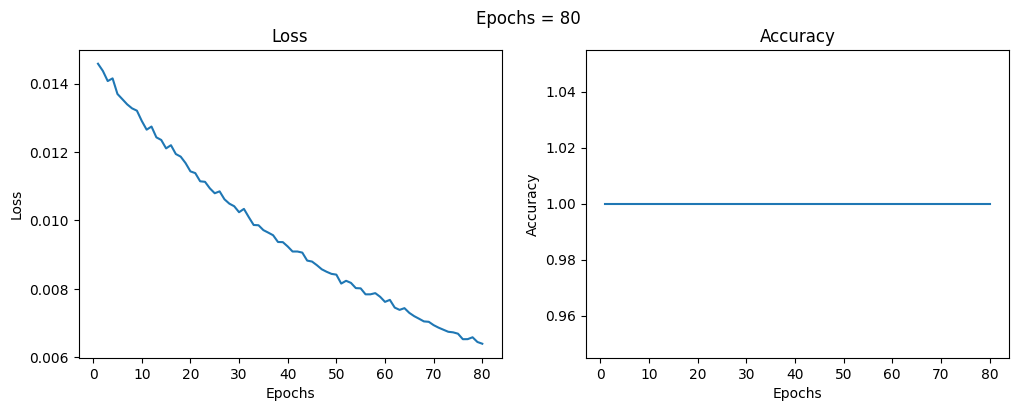

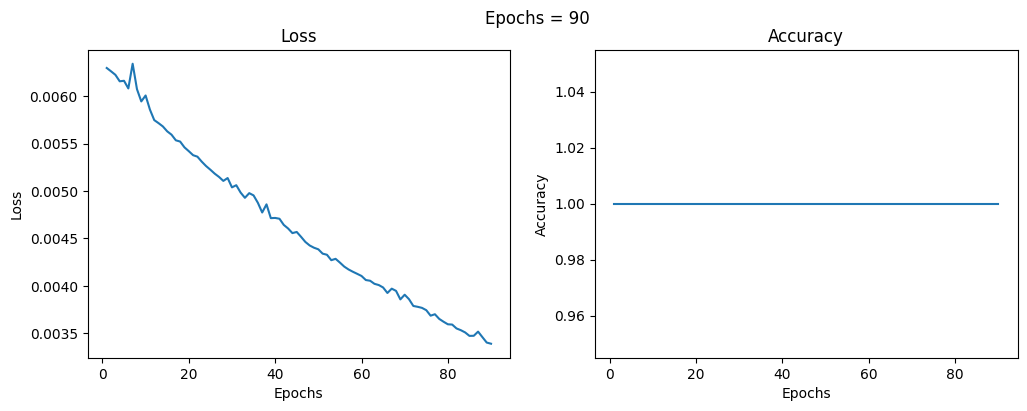

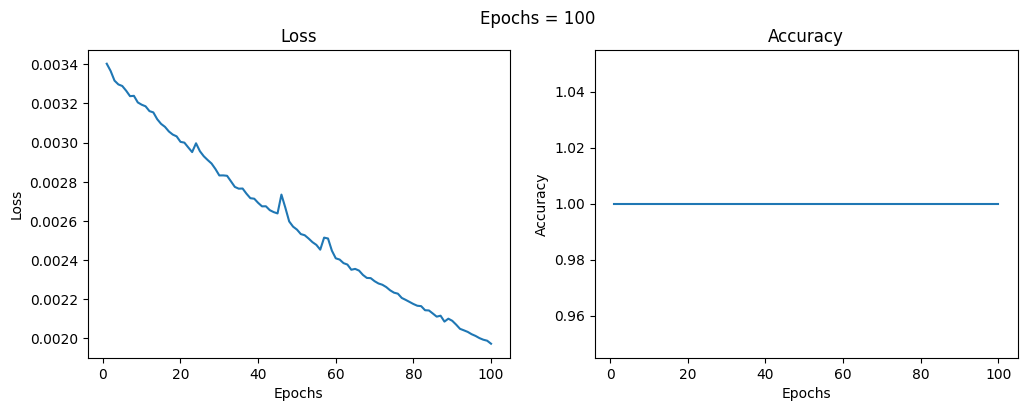

In [43]:
# 4. Your original training loop with plotting

epochs_cumulative = 10

for i in range(10):

    history = model.fit(X_train, y_train, epochs=epochs_cumulative, verbose=0)
    epochs_cumulative += 10

    loss = history.history['loss']
    accuracy = history.history['accuracy']
    epochs = range(1, len(loss) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'Epochs = {epochs_cumulative-10}')

    axes[0].plot(epochs, loss)
    axes[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')

    axes[1].plot(epochs, accuracy)
    axes[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')

    plt.show()

## How to Make Results Reproducible?

In [44]:
import numpy as np
import tensorflow as tf
import random

# Set all random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

# For TensorFlow 2.x, also add:
tf.config.experimental.enable_op_determinism()

# Bro this is the actual case of vanishing gradient descent 😂

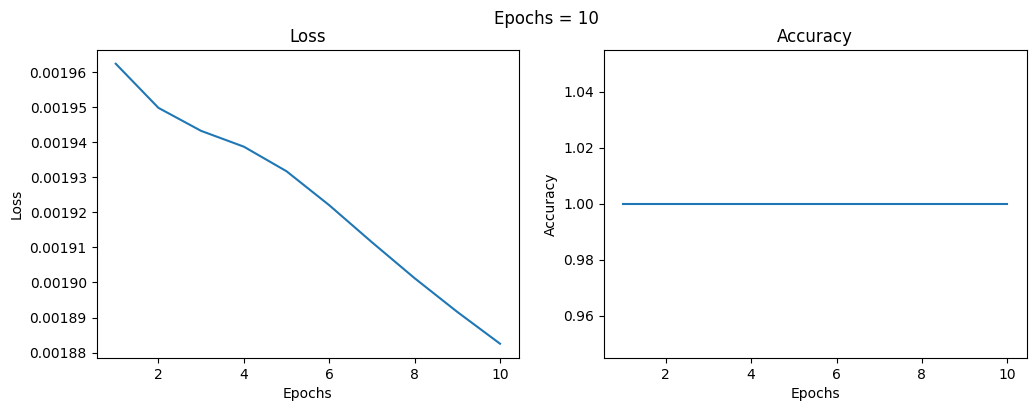

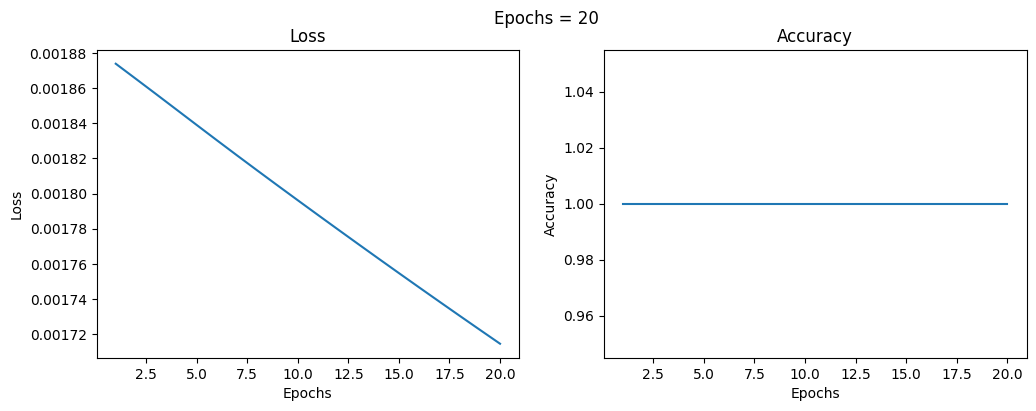

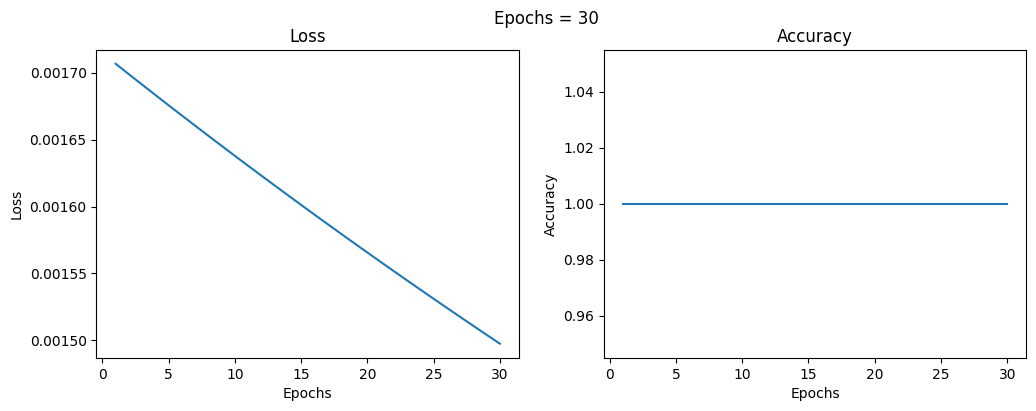

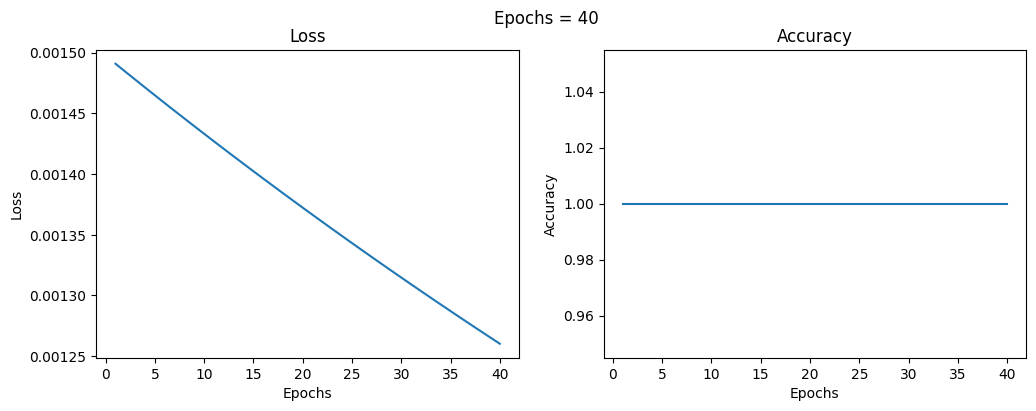

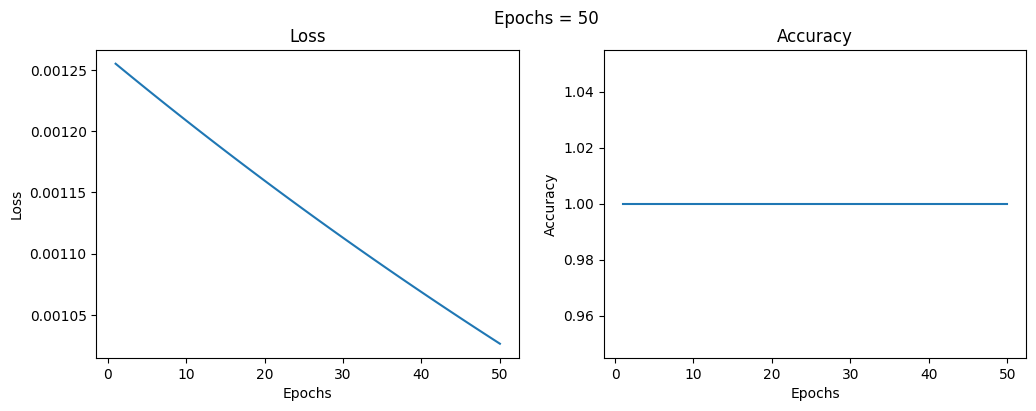

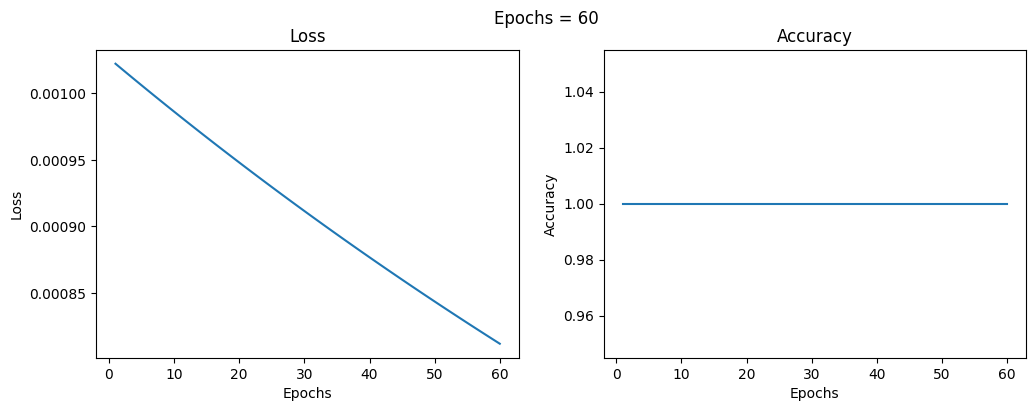

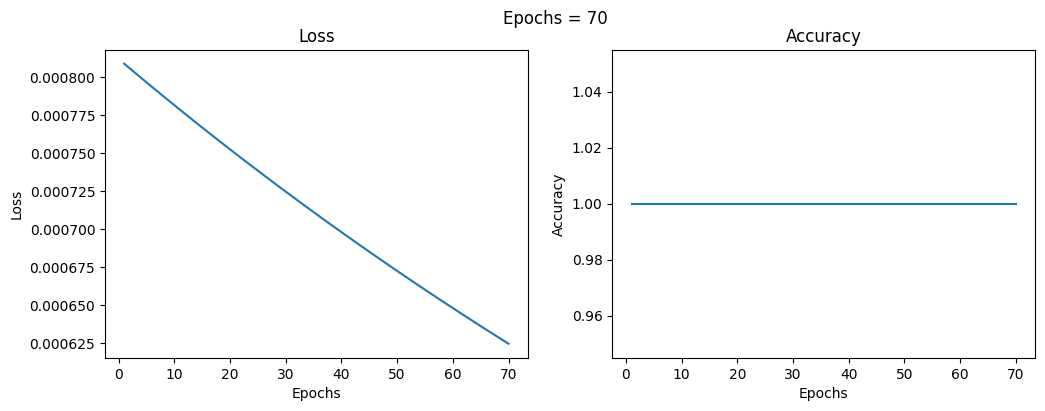

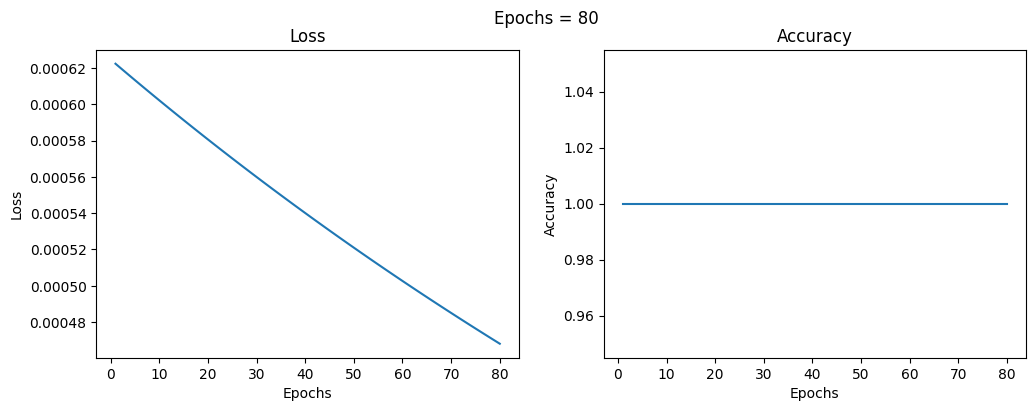

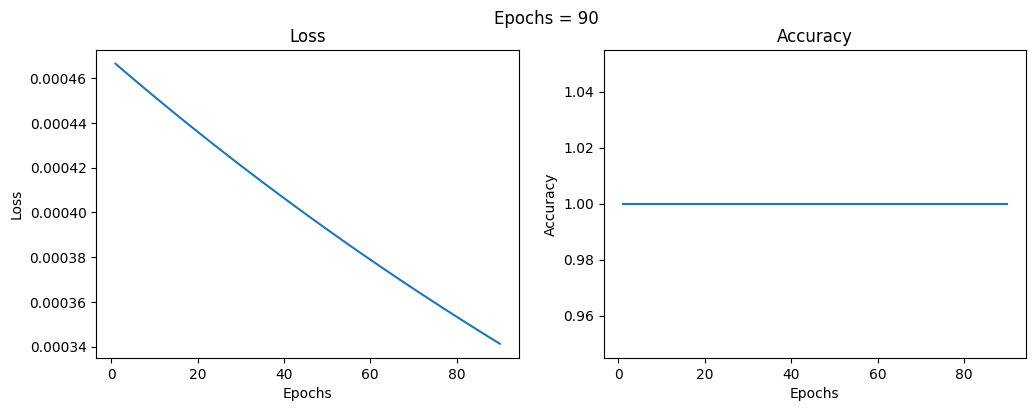

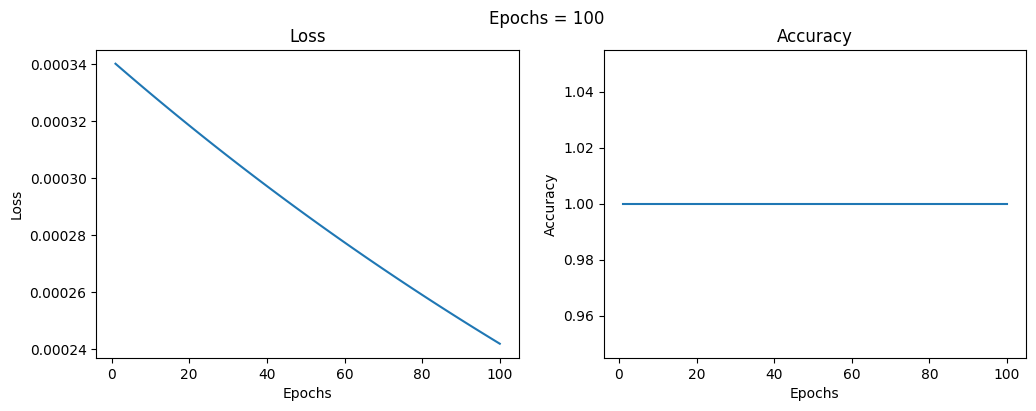

In [45]:
# 4. Your original training loop with plotting

epochs_cumulative = 10

for i in range(10):

    history = model.fit(X_train, y_train, epochs=epochs_cumulative, verbose=0)
    epochs_cumulative += 10 # epochs: 10, 20, 30, ... 100

    loss = history.history['loss']
    accuracy = history.history['accuracy']
    epochs = range(1, len(loss) + 1) # x-axis: x, on each iteration

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'Epochs = {epochs_cumulative-10}')

    axes[0].plot(epochs, loss)
    axes[0].set(title='Loss', xlabel='Epochs', ylabel='Loss')

    axes[1].plot(epochs, accuracy)
    axes[1].set(title='Accuracy', xlabel='Epochs', ylabel='Accuracy')

    plt.show()

# Solution 1: Reduce the number of layers

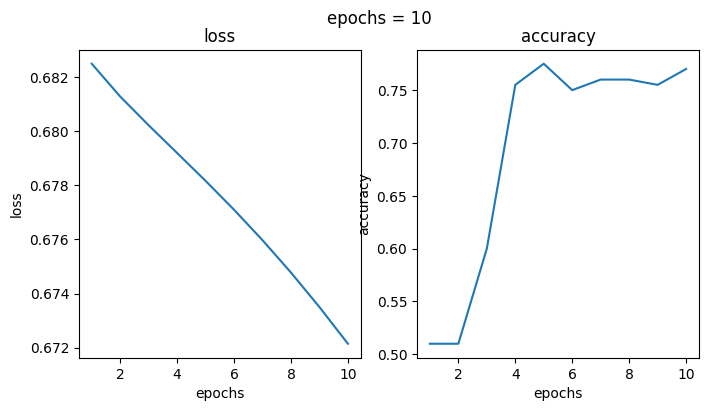

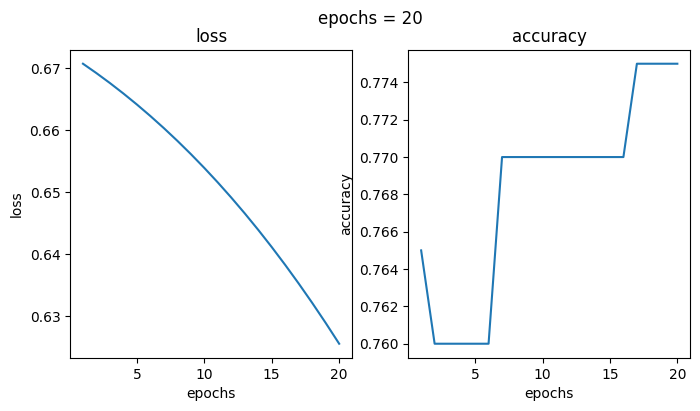

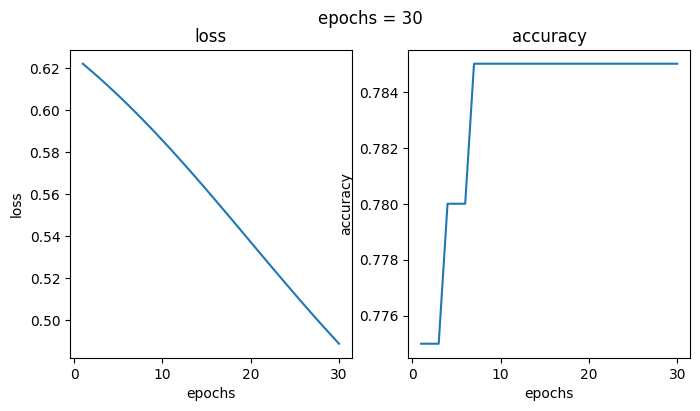

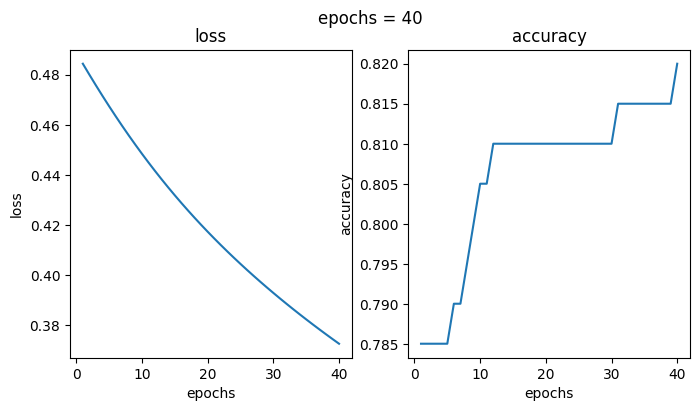

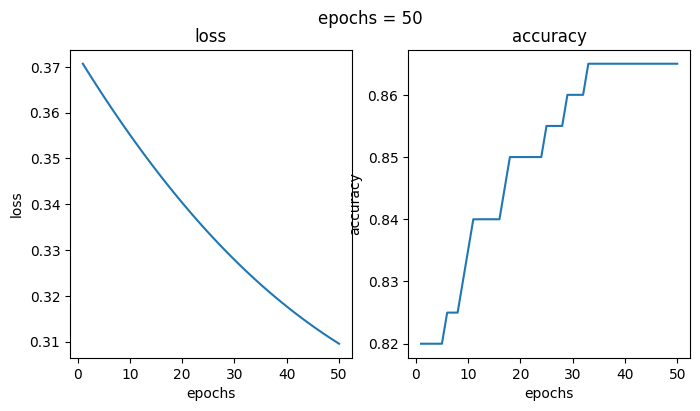

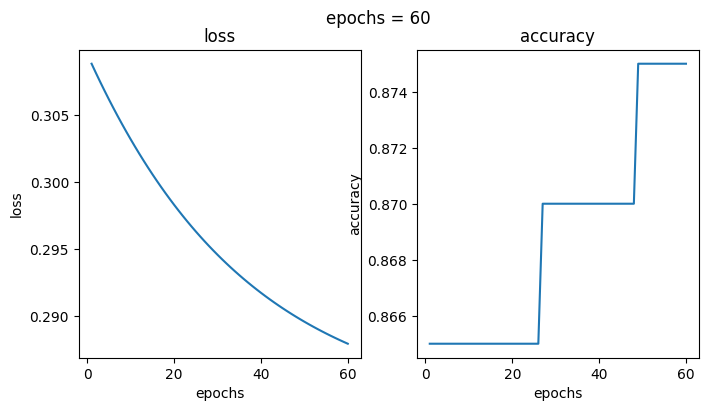

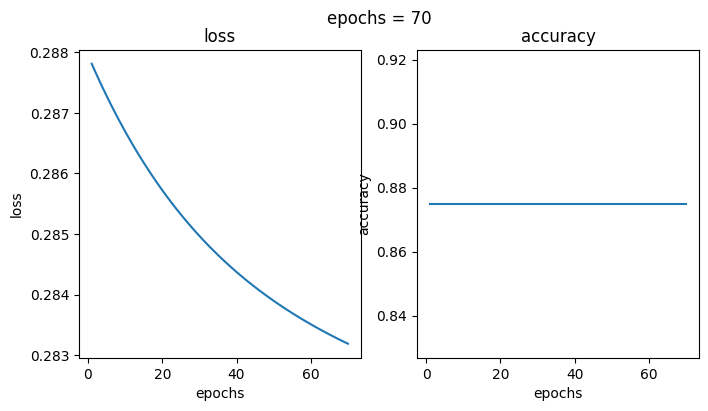

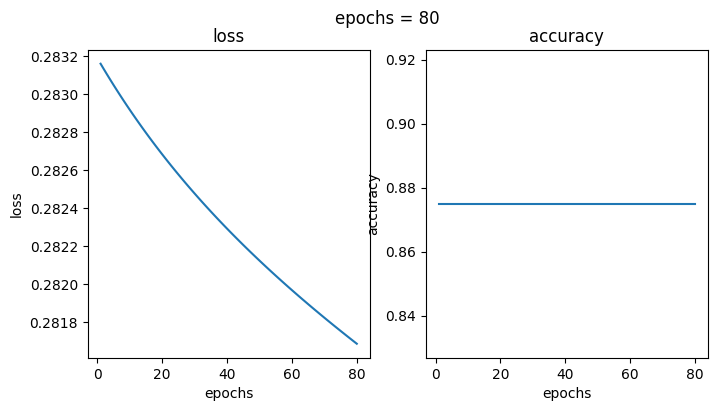

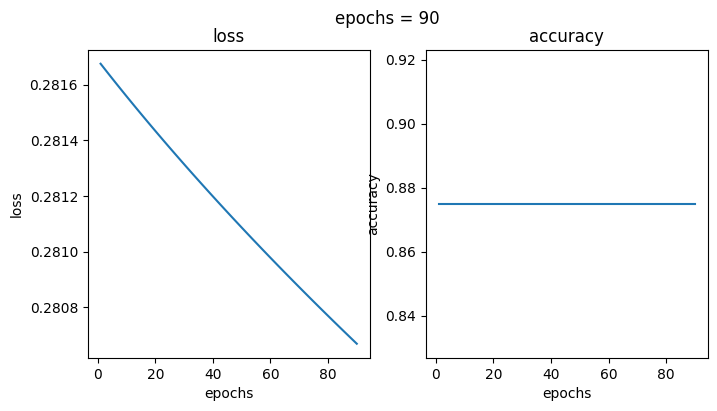

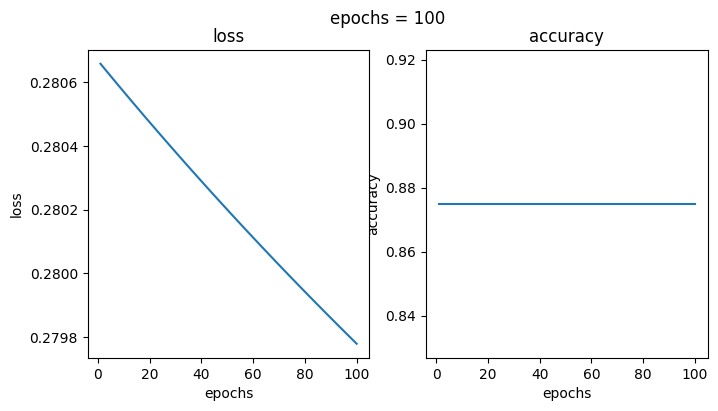

In [55]:
# Step 1: import libraries

# Step 2: define layers


model = Sequential()

model.add(Dense(10, activation='sigmoid',input_dim=2)) # hidden layer 1 that accepts the inputs
model.add(Dense(10, activation='sigmoid')) # hidden layer 2
model.add(Dense(1,activation='sigmoid')) # output layer also note the number of nodes


# Step 3: Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: model training

cum_epochs = 10

for i in range(10):
    history = model.fit(X_train,y_train, epochs=cum_epochs, verbose=0)
    cum_epochs += 10

    loss = history.history['loss']
    accuracy = history.history['accuracy']
    epochs = range(1, len(loss) + 1)
    
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    fig.suptitle(f"epochs = {cum_epochs-10}")
    
    axes[0].plot(epochs,loss)
    axes[0].set(title='loss', xlabel='epochs',ylabel='loss')

    axes[1].plot(epochs,accuracy)
    axes[1].set(title='accuracy', xlabel='epochs', ylabel='accuracy')
    
    
    

## Solution 1 doesn't perform well enough and see the results after 70 epochs

# Solution 2: Use RELU function

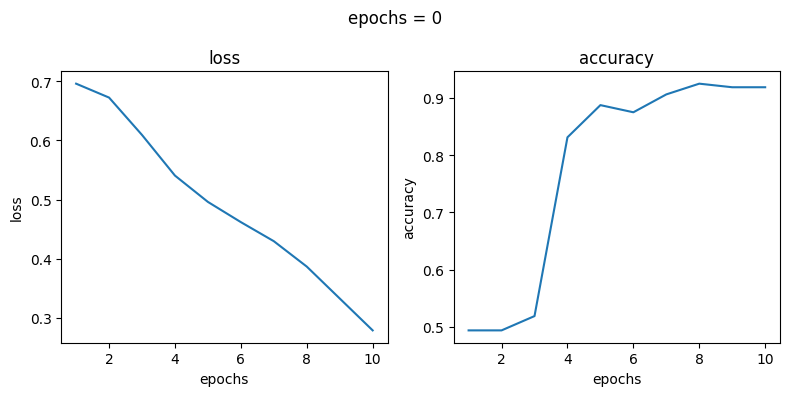

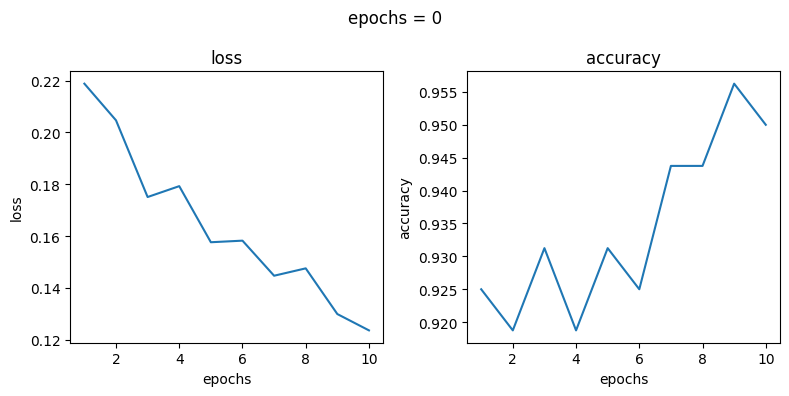

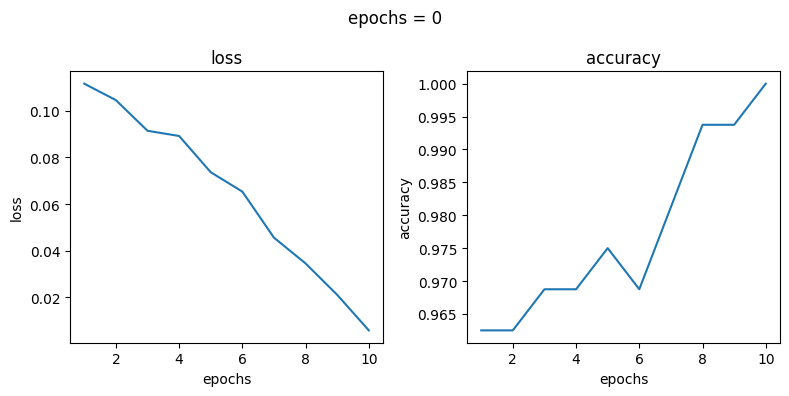

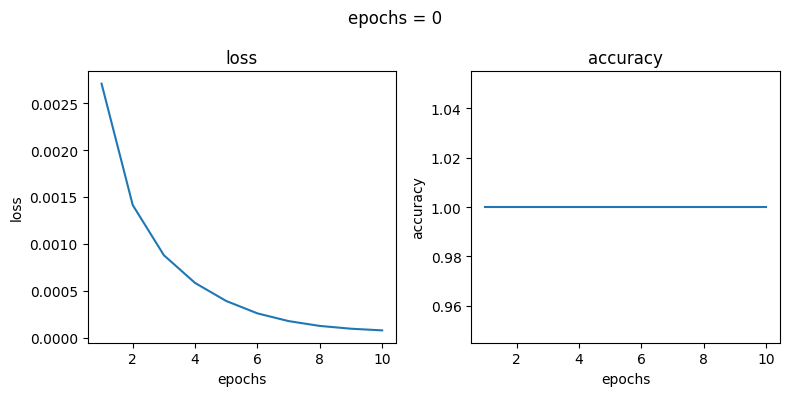

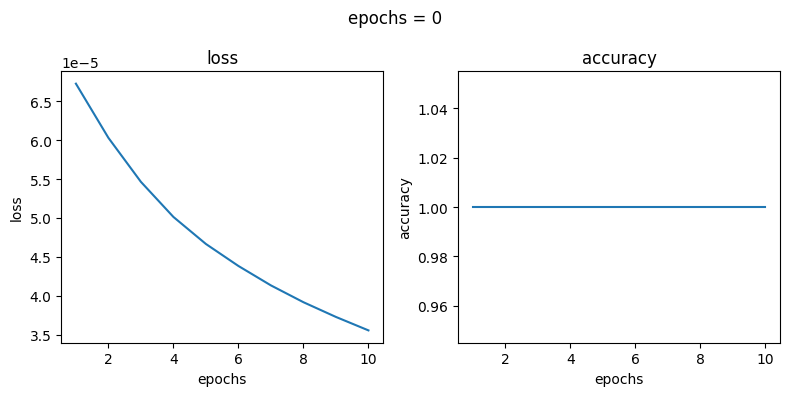

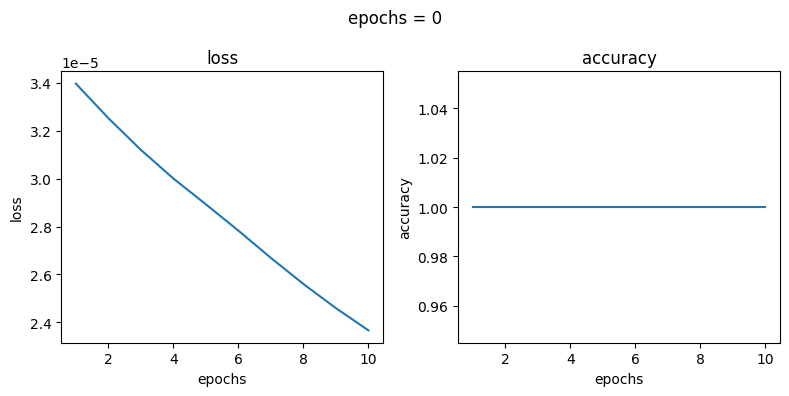

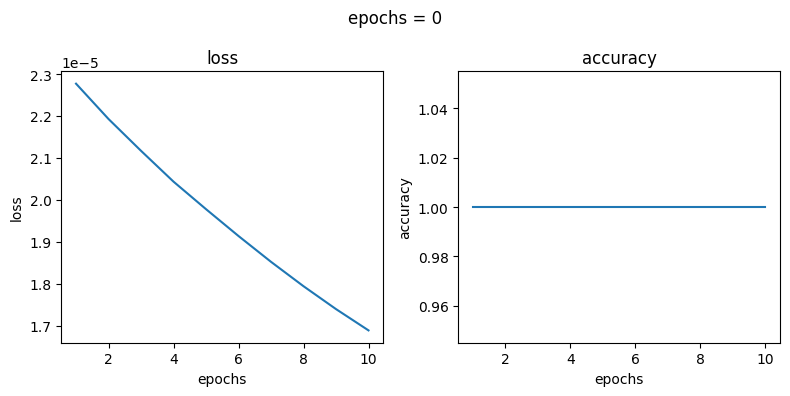

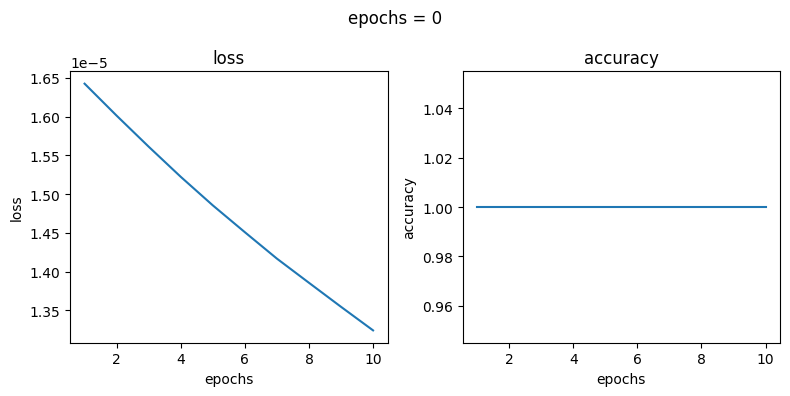

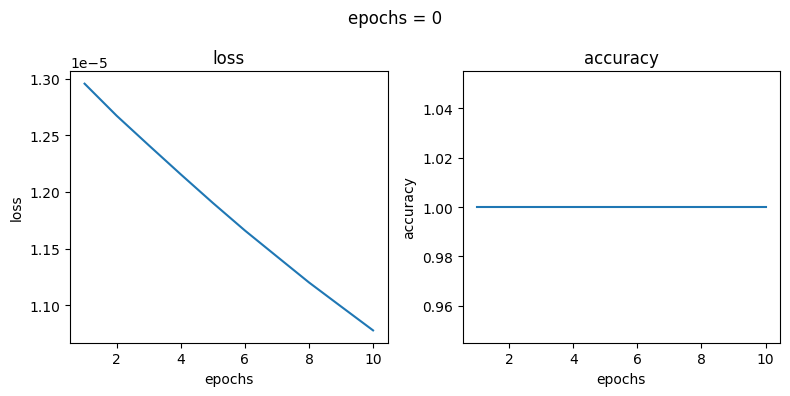

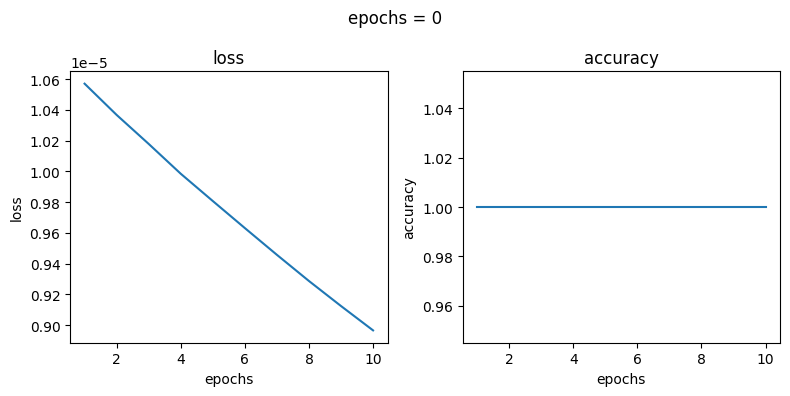

In [66]:
# Step 1: import libraries

# Step 2: define layers

model = Sequential()

model.add(Dense(10,activation='relu', input_dim=2)) # hidden layer 1
model.add(Dense(10,activation='relu')) # 2
model.add(Dense(10,activation='relu')) # 3
model.add(Dense(10,activation='relu')) # 4
model.add(Dense(10,activation='relu')) # 5
model.add(Dense(10,activation='relu')) # 6
model.add(Dense(1,activation='sigmoid')) # 7: output layer, 1 node and sigmoid because relu's output isn't between 0 and 1


# Step 3: Compile the model

model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

# Step 4: Train the model

# This code will retrain the model each time from start again and again

# cum_epochs = 10

# for i in range(cum_epochs):
    
#     # train model
#     history = model.fit(X_train, y_train, epochs=cum_epochs, verbose=0)    
#     cum_epochs += 10 # increment epochs after each iteration by 10


# Track the epochs and avoid retraining
total_epochs = 0
epochs_per_cycle = 10

for i in range(10):
    # Train model (continue from previous state)
    history = model.fit(X_train, y_train,
                       initial_epoch=total_epochs,
                       epochs=total_epochs + epochs_per_cycle,
                       verbose=0,
                       validation_split=0.2)  # Added validation
    
    total_epochs += epochs_per_cycle   

    loss = history.history['loss']
    accuracy = history.history['accuracy']
    epochs = range(1, len(loss) + 1) # x-axis
    
    fig , axes = plt.subplots(1,2,figsize=(8,4))
    fig.suptitle(f"epochs = {cum_epochs-10}")

    axes[0].plot(epochs, loss)
    axes[0].set(title='loss', xlabel='epochs', ylabel='loss')

    axes[1].plot(epochs,accuracy)
    axes[1].set(title='accuracy', xlabel='epochs', ylabel='accuracy')

    plt.tight_layout()
    